In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = "input/delhi-climate/DailyDelhiClimateTrain.csv"
df = pd.read_csv(path)

x = df.set_index(pd.to_datetime(df["date"]))["meantemp"].to_frame()
x_bounded = x.loc[x.index < "2013-04-01"]

x_bounded.head()

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000


# Lag plot

In [4]:
x_bounded = x_bounded.assign(
    lag1=x_bounded["meantemp"].shift(1),
    lag2=x_bounded["meantemp"].shift(2),
    lag3=x_bounded["meantemp"].shift(3),
    lag4=x_bounded["meantemp"].shift(4),
    lag5=x_bounded["meantemp"].shift(5),
    lag6=x_bounded["meantemp"].shift(6),
    lag7=x_bounded["meantemp"].shift(7),
)
x_bounded.head()

,meantemp,lag1,lag2,lag3,lag4,lag5,lag6,lag7
date,,,,,,,,
2013-01-01,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,7.400000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,7.166667,7.400000,10.000000,NaN,NaN,NaN,NaN,NaN
2013-01-04,8.666667,7.166667,7.400000,10.0,NaN,NaN,NaN,NaN
2013-01-05,6.000000,8.666667,7.166667,7.4,10.0,NaN,NaN,NaN


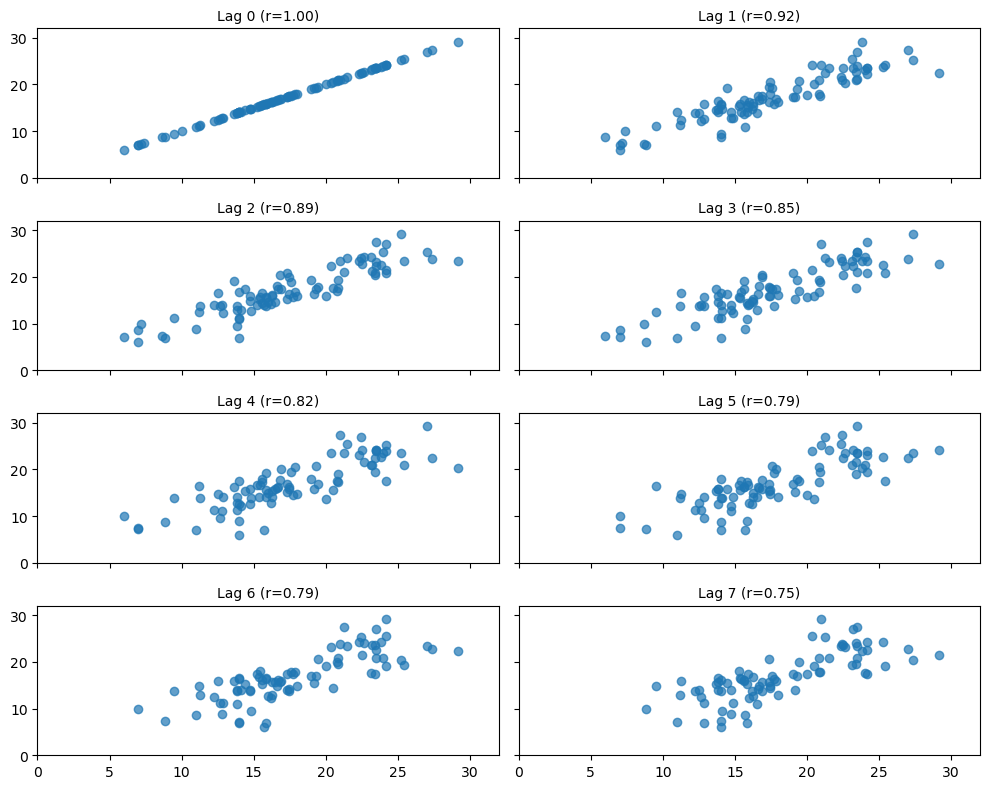

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

fig, axes = plt.subplots(4, 2, figsize=(10, 8), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten(), start=0):

    if i >= len(x_bounded.columns):
        ax.axis("off")
        continue

    if i == 0:
        x_axis = x_bounded.loc[:, "meantemp"]
        y_axis = x_axis
    else:
        x_axis = x_bounded.loc[:, "meantemp"]
        y_axis = x_bounded.iloc[:, i]

    ax.scatter(x_axis, y_axis, alpha=0.7)

    # Calculate Pearson correlation
    mask = (x_axis.notna().values) & (y_axis.notna().values)
    corr, _ = pearsonr(x_axis[mask].values, y_axis[mask].values)

    ax.set_title(f"Lag {i} (r={corr:.2f})", fontsize=10)
    ax.set_xlim(0, 32)
    ax.set_ylim(0, 32)

plt.tight_layout()
plt.show()

# ACF and PACF

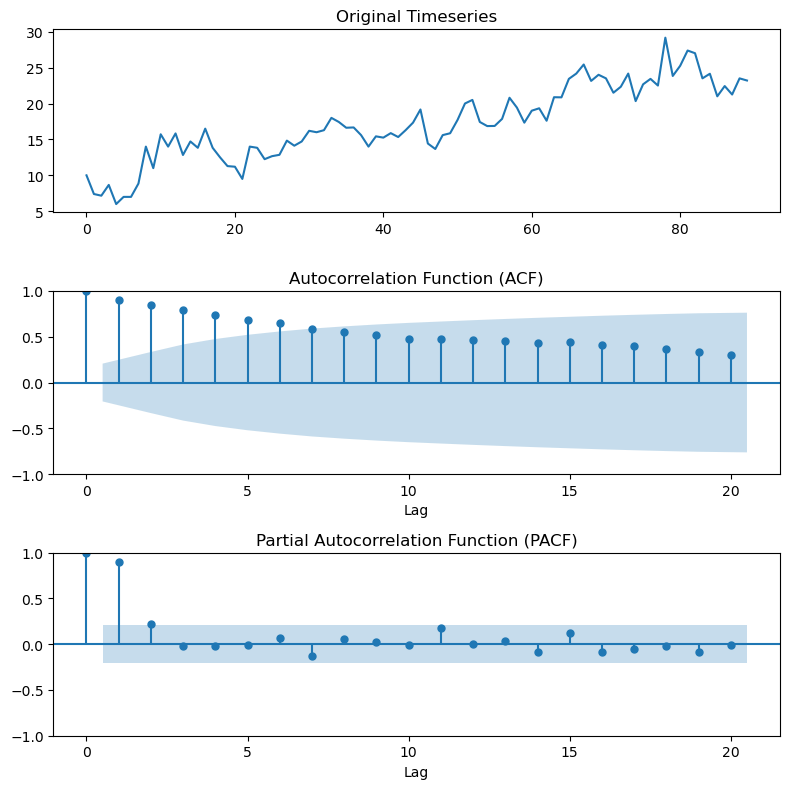

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create plots
fig, ax = plt.subplots(3, 1, figsize=(8, 8))

# Plot the time series
ax[0].plot(range(len(x_bounded["meantemp"])), x_bounded["meantemp"])
ax[0].set_title("Original Timeseries")

# Plot ACF
plot_acf(x_bounded["meantemp"], ax=ax[1])
ax[1].set_title("Autocorrelation Function (ACF)")
ax[1].set_xlabel("Lag")

# Plot PACF
plot_pacf(x_bounded["meantemp"], ax=ax[2])
ax[2].set_title("Partial Autocorrelation Function (PACF)")
ax[2].set_xlabel("Lag")

plt.tight_layout()
plt.show()

#### Interpreting ACF 

What it shows: The ACF plot displays the correlation between the time series and its lagged values at different lags.

Key observations:

- The autocorrelation starts at 1 for lag 0 (perfect correlation with itself, as expected).
- There is high autocorrelation at all lags (gradual decay rather than a sharp cutoff). This is typical of non-stationary time series, where values are highly dependent on past values due to the trend.
- **The gradual decay indicates a potential AR(1) process** or a trending time series (e.g., random walk).

Stationarity Check:

- The ACF suggests that the series is non-stationary, as the correlations remain high across multiple lags. For a stationary series, autocorrelations should decay quickly to near zero after a few lags.

#### Interpreting PACF

What it shows: The PACF plot isolates the direct effect of each lag on the time series while removing the effects of intermediate lags.

Key observations:
- Significant partial autocorrelation at lag 1, suggesting that the series is influenced directly by its most recent past value.
- After lag 1, the partial autocorrelations drop quickly and become insignificant (within the confidence interval). **This pattern is indicative of an AR(1) process**.